In [1]:
import numpy as np
from BPmodule.BPGen import CreateData
from BPnumba.GeneticOperators import CreatePoblation,InstancePob,CreateHeuristicPob
from BPnumba.AGH import createAG
import matplotlib.pyplot as plt
from numba.typed import List as NumbaList


In [11]:
contenedor,data = CreateData(algorithm=2,problem=2)


In [12]:
datos = NumbaList(data[0])

In [13]:
idBoxes = np.arange(1,len(datos)+1,dtype=np.int64)
n= len(datos)
pop= 50
initial = CreateHeuristicPob(pop,datos,contenedor)
maxItr=1000
n,pop

(25, 50)

In [14]:
Pob = InstancePob(NumbaList(initial),NumbaList(datos),contenedor)

In [15]:
ag = createAG(ps=0.85,pc=0.75,adaptive=True)

In [16]:
ag.Train(maxItr,Pob,NumbaList(datos),contenedor)

In [17]:
ag.BestInd.fi,ag.BestInd.codeSolution

(1.0, '|1|21|20|3|8|9|2|19|4|18|16|17|22|14|15|5|10|11|7|25|6|24|12|23|13|')

In [18]:
n-ag.BestInd.load

0

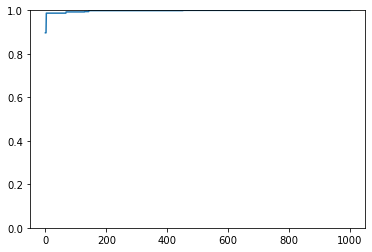

In [19]:
plt.figure()
plt.plot(ag.bestfi)
plt.ylim(0,1)
plt.show()